<b>CÁLCULO DE INTEGRAIS USANDO AMOSTRAS DE NÚMEROS ALEATÓRIOS</b>

1. Métodos de Monte Carlo para cálculo de integrais

1.1. Cálculo do integral $f(x)=x^2$, $0\leq x\leq 4$ usando técnicas de Monte-Carlo.

Podemos utilizar amostras de números aleatórios para fazer cálculos de integrais. A ideia é muito simples. Imaginemos que pretendemos calcular o integral da função $f(x)=x^2$, entre 0 e 4.

<center>$\displaystyle I=\int_{0}^4 x^2dx$</center>

Este integral é fácil de calcular (faça-o numa folha à parte). Verá que o resultado será de $\frac{64}{3} \approx 21.333$.

Mas vamos imaginar que não sabemos calcular o valor do integral. Como calcular usando números aleatórios? Como sabemos, o cálculo de um integral corresponde ao cálculo da área por baixo da função. Uma primeira aproximação seria  correr dois números aleatórios $\xi_1$ e $\xi_2$ de 0 até 4, 

In [8]:
# Script para determinar dois números aleatórios.
%matplotlib inline
from random import seed
from random import random
import os
import os
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
seed(1)
xi1=4.0*random()
xi2=4.0*random()
print(xi1)
print(xi2)

0.5374569764496049
3.3897349477489307


determinar $f(\xi_1)$ e $f(\xi_2)$, e finalmente calcular o valor da área do rectângulo definido por cada um desses valores com altura $h_1=f(\xi_1)$ e $h_2=f(\xi_2)$ e largura de 0 até 4 ($l=4-0$):
- $A_{\xi_1}=l*h=(4-0)f(\xi_1)$
- $A_{\xi_2}=l*h=(4-0)f(\xi_2)$, 

fazer a média que será aproximadamente igual à area de I:

$\displaystyle I\approx \frac{1}{2}(A_{\xi_1}+A_{\xi_2})=\frac{1}{2}(4-0)[f({\xi_1})+f({\xi_2})]$

Text(2, 13.5, 'area por baixo')

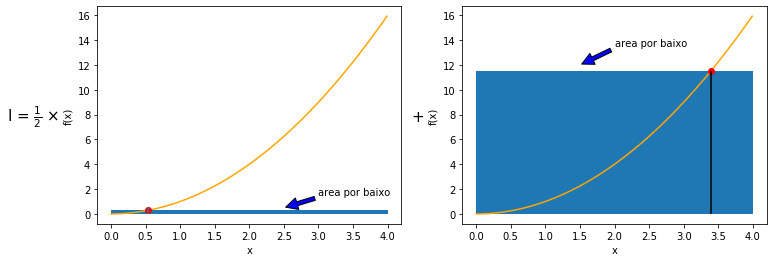

In [9]:
# Script para determinar a área por baixo do número determinado em cima
%matplotlib inline
from random import seed
from random import random
import os
import os
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
xi1=0.53745697645
xi2=3.38973494775
y1=[xi1**2]
y2=[xi2**2]
func = np.arange(0., 4., 0.01)
for i in range(0,4,1):
    y1.append(xi1**2)
    y2.append(xi2**2)
x1 = np.arange(len(y1))
x2 = np.arange(len(y2))

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True,figsize=(12, 4))

ax1.fill_between(x1, 0, y1)
ax1.plot(func,func**2,color='orange')
ax1.plot(xi1, xi1**2, 'or')
ax1.axvline(x=xi1, ymin=0.05, ymax=xi1**2/4)
ax1.set_ylabel('f(x)')
ax1.set_xlabel('x')
ax1.text(4.35, 7.5, r'+', fontsize=15)
ax1.text(-1.5, 7.5, r'I = $\frac{1}{2}$ $\times$', fontsize=15)
ax1.annotate('area por baixo', xy=(2.5, 0.5), xytext=(3, 1.5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             )

ax2.plot(func,func**2,color='orange')
ax2.fill_between(x2, 0, y2)
ax2.plot(xi2, xi2**2, 'or')
ax2.axvline(x=xi2, ymin=0.05, ymax=xi2**2/16.5, color='black')
ax2.set_ylabel('f(x)')
ax2.set_xlabel('x')
ax2.annotate('area por baixo', xy=(1.5, 12), xytext=(2, 13.5),
             arrowprops=dict(facecolor='blue', shrink=0.05),
             )



Como vemos esta primeira aproximação é muito fraca. Mas podemos fazer isso com três intervalos, quatro intervalos, etc. Graças ao TLC, quando o número de intervalos $N$ tender para infinito, o valor da nossa soma tenderá para o valor do integral.

21.137895601936144


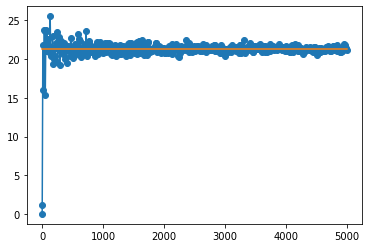

In [13]:
# Script para cálculo do integral de f(x)=x^2, 0<=x<=4 usando MC
%matplotlib inline
from random import seed
from random import random
import os
import os
import math
from math import pi
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#os.system('clear')
# integrar usando números aleatorios x^2 de 0 a 4
seed(1)
x2=[0]
y2=[0]
res=[21.3333333]
for N in range (1,5000,10):
    x=0.00000000
    a=21.3333333
    total=0.00000
    for i in range(N):
        r=4.0*random()
        x = x + r*r
    os.system('clear')
    float(total)
    total = (4.0/N)*x 
    x2.append(N)
    y2.append(total)
    res.append(a)
print(total)
plt.plot(x2, y2,'-o')
plt.plot(x2, res)
# plt.show()





Comentário: para a função $f(x)=x^2$, é fácil calcular analiticamente, o que acontece para integrais mais complicados?
Exercício: calcular numericamente o integral $\displaystyle \int_{0}^{10} \frac{dx}{x^2-1}$ usando a técnica de Monte Carlo

1.2. Cálculo de Pi usando números aleatórios.

Neste exemplo, faremos a estimativa do valor de $\pi$ usando amostras de números aleatórios, mas iremos mais longe neste caso, usando um algoritmo de rejeição. A ideia por trás do cálculo de $\pi$ utilizando métodos aleatórios foi pela primeira vez pensada por ---, e passa por nos lembrarmos do seguinte:

Imaginemos um círculo de raio r inscrito dentro de um quadrado de lado L:


In [90]:
html = '<svg height="400" width="400"><line x1="190" y1="190" x2="340" y2="190" stroke="black" stroke-width="3" /><rect x="40" y="40" width="300" height="300" stroke="black" stroke-width="3" fill="none" /><circle cx="190" cy="190" r="150" stroke="black" stroke-width="3" fill="none" /><text x="260" y="185" stroke-width="3" fill="black">r=L/2</text></svg>'
display(HTML(html))




A área do quadrado é de $A_q=L^2$, enquanto que a área do círculo é de $A_c=\pi r^2=\pi \frac{L^2}{4}$.
A razão da área do círculo para a área do quadrado será simplesmente de $ \frac{A_c}{A_q} =\frac{\pi}{4}$. 
Uma forma de calcular o valor de $\pi$ é simplesmente fazer "tiro ao alvo". Ou seja, consideramos um círculo de raio=1. Definimos dois números aleatórios $x\leq 1$ e $y\leq 1$.
Se:
- $x^2+y^2\leq 1$, significa que o número se encontra dentro da área do círculo, então aceitamos;
- $x^2+y^2>1$, significa que o número se encontra fora da área do círculo, <i>mas</i> dentro da área do quadrado, então não aceitamos.

Se iterarmos $N$ vezes, com $N$ suficientemente grande, a soma de todos os números que aceitarmos, vai corresponder à estimativa da razão da área do círculo sobre a área do quadrado, que como já tínhamos visto, vale $\frac{\pi}{4}$. Então, multiplicando por 4, obtemos uma estimativa para o número $\pi$. E construímos o nosso primeiro algoritmo com Monte-Carlo!

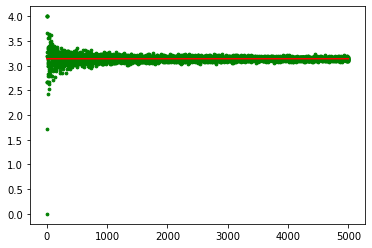

valor de pi= 3.141592653589793
resultado= 3.143028605721144
desvio= 0.00045686893486656


In [21]:
%matplotlib inline
from random import seed
from random import random
import os
import math
from math import pi
from math import sqrt
import matplotlib.pyplot as plt 
import numpy as np 
# integrar usando números aleatorios x e y de 0 a 1
seed(1)
x1=[0]
y1=[0]
res=[math.pi]
for N in range (1,5000,1):
	int=0
	int2=0
	for i in range(N):
		x=random()
		y=random()
		a=math.pi
		r=x**2+y**2
		if r<=1:
			int= int + 1
	int2=4.0/N*int
	# os.system('clear')
	# print(int2)
	dev=abs((int2-pi)/int2)
	# print(dev)
	x1.append(N)
	y1.append(int2)
	res.append(a)
plt.plot(x1, res, color= "red")
plt.scatter(x1, y1, label= "stars", color= "green",marker= ".", s=30) 
plt.show()
print('valor de pi=',math.pi)
print('resultado=',int2)
print('desvio=',dev)
	